In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [29]:
df = pd.read_csv('spam_ham_dataset.csv')

In [30]:
print(df)

      Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1             0  
2             0  
3  

In [31]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [33]:
df.shape

(5171, 4)

In [34]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [35]:
df = df.drop(['Unnamed: 0'],axis=1)

In [36]:
df

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [37]:
df.isnull().sum()

label        0
text         0
label_num    0
dtype: int64

In [38]:
X = df['text']
Y = df['label_num']

In [39]:
print(X)

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object


In [40]:
print(Y)

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label_num, Length: 5171, dtype: int64


In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=3)

In [42]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5171,)
(3619,)
(1552,)


In [43]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5171,)
(3619,)
(1552,)


In [44]:
feature_extraction = TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train=Y_train.astype('int')
Y_test = Y_test.astype('int')

In [45]:
print(X_train)

1876    Subject: may wellheads\r\ndavid here is the ot...
1704    Subject: new hpl meter - vidor city gate - che...
4876    Subject: your mother may find out\r\nremove\r\...
25      Subject: re : enron / hpl actuals for october ...
2193    Subject: hpl noms for june 06 , 2000\r\n( see ...
                              ...                        
789     Subject: incr ' ease yo ' ur man ' hood by 4 -...
968     Subject: subscribers receive first notice on r...
1667    Subject: neon for march 28\r\nhere is the neon...
3321    Subject: re : first delivery - pure resources ...
1688    Subject: enhance your chest size\r\nemail is l...
Name: text, Length: 3619, dtype: object


In [19]:
print(X_train_features)

  (0, 469)	0.04234497175924303
  (0, 521)	0.09357075330914992
  (0, 3829)	0.09357075330914992
  (0, 29506)	0.08910783023045304
  (0, 39995)	0.08910783023045304
  (0, 3938)	0.04447828877586618
  (0, 569)	0.09357075330914992
  (0, 3836)	0.09357075330914992
  (0, 29162)	0.08594133591368462
  (0, 38336)	0.08147841283498775
  (0, 1195)	0.08910783023045304
  (0, 3916)	0.09357075330914992
  (0, 24347)	0.06413660599354906
  (0, 36812)	0.03834594227552464
  (0, 3790)	0.09357075330914992
  (0, 36681)	0.08910783023045304
  (0, 1022)	0.0391784774424746
  (0, 1121)	0.08910783023045304
  (0, 3762)	0.09357075330914992
  (0, 36184)	0.06533855415269353
  (0, 3530)	0.05577312179813425
  (0, 499)	0.09357075330914992
  (0, 3853)	0.09357075330914992
  (0, 34944)	0.09357075330914992
  (0, 3774)	0.08348521210646197
  :	:
  (3618, 13169)	0.0634574032194839
  (3618, 4945)	0.07085860257936485
  (3618, 25157)	0.0747398329785886
  (3618, 39904)	0.059824817760223914
  (3618, 33314)	0.06697737218014109
  (3618, 243

# Logistic Regression

In [20]:
model = LogisticRegression()

In [21]:
model.fit(X_train_features,Y_train)

LogisticRegression()

In [22]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train,prediction_on_training_data)

In [23]:
print('Acc on training data: ',accuracy_on_training_data)

Acc on training data:  0.9969604863221885


In [24]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test,prediction_on_test_data)
print('Acc on testing data: ',accuracy_on_test_data)

Acc on testing data:  0.9845360824742269


In [25]:
input_your_mail = ['congretualation!! you won 20000 rupees click here to collect in your bank account']
# input_your_mail = ['exam room number is 101']
input_data_features = feature_extraction.transform(input_your_mail)
prediction = model.predict(input_data_features)
print(prediction)
if(prediction[0]==1):
    print('Spam mail')
else:
    print('ham mail(not spam)')

[1]
Spam mail


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [27]:
cm = metrics.confusion_matrix(Y_test,prediction_on_test_data)
print(cm)

[[1086   20]
 [   4  442]]


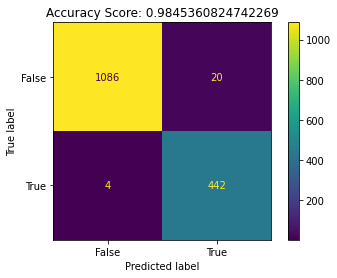

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(Y_test, prediction_on_test_data)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
cm_display.plot()

all_sample_title = 'Accuracy Score: {0}'.format(accuracy_on_test_data)
plt.title(all_sample_title, size = 12);



# Naive bayes

In [46]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [47]:
classifier.fit(X_train_features,Y_train)

MultinomialNB()

In [48]:
Y_pred = classifier.predict(X_test_features)

In [49]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.916881443298969
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      1106
           1       0.99      0.72      0.83       446

    accuracy                           0.92      1552
   macro avg       0.94      0.86      0.89      1552
weighted avg       0.92      0.92      0.91      1552



In [50]:
cm = metrics.confusion_matrix(Y_test,Y_pred)
print(cm)


[[1103    3]
 [ 126  320]]


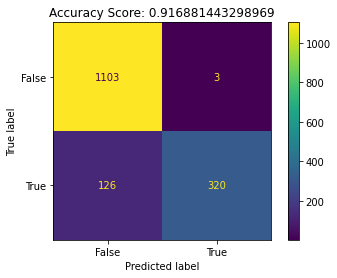

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(Y_test, Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
cm_display.plot()

all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 12);

# Support Vector Machine(SVM)

In [486]:
from sklearn.svm import SVC  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train_features, Y_train)

SVC(kernel='linear', random_state=0)

In [487]:
Y_pred= classifier.predict(X_test_features)

In [488]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(Y_test, Y_pred) 

In [489]:
print(cm)

[[1089   17]
 [   1  445]]


In [490]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.9884020618556701
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1106
           1       0.96      1.00      0.98       446

    accuracy                           0.99      1552
   macro avg       0.98      0.99      0.99      1552
weighted avg       0.99      0.99      0.99      1552



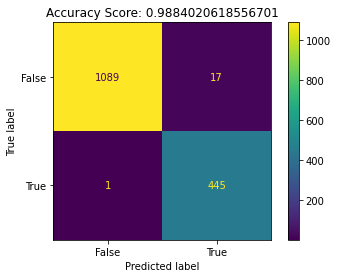

In [491]:

confusion_matrix = confusion_matrix(Y_test, Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
cm_display.plot()

all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 12);

# Decision tree

In [30]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train_features, Y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [31]:
Y_pred= classifier.predict(X_test_features)  

In [32]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test, Y_pred) 
print(cm)

[[1049   57]
 [  31  415]]


In [33]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.9432989690721649
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1106
           1       0.88      0.93      0.90       446

    accuracy                           0.94      1552
   macro avg       0.93      0.94      0.93      1552
weighted avg       0.94      0.94      0.94      1552



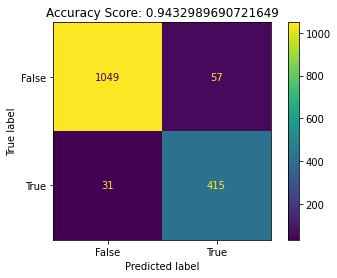

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(Y_test, Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
cm_display.plot()

all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 12);

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train_features, Y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [36]:
Y_pred= classifier.predict(X_test_features)  

In [37]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(Y_test, Y_pred) 
print(cm)


[[1077   29]
 [  38  408]]


In [38]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.9568298969072165
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1106
           1       0.93      0.91      0.92       446

    accuracy                           0.96      1552
   macro avg       0.95      0.94      0.95      1552
weighted avg       0.96      0.96      0.96      1552



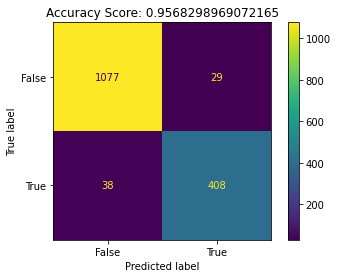

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(Y_test, Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
cm_display.plot()

all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 12);